In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from utils import year_vs_month_intermonth, generate_bar_data, sorter, spearman

In [14]:
df1 = pd.read_csv("output/IntraInter/BankNifty_Monthly_IntraInter.csv")
df2 = pd.read_csv("output/IntraInter/Nifty_Monthly_IntraInter.csv")
df3 = pd.read_csv("output/IntraInter/Gold_Monthly_IntraInter.csv")
df4 = pd.read_csv("output/IntraInter/Vix_Monthly_IntraInter.csv")

In [15]:
df1['Date'] = pd.to_datetime(df1['Date'], format="%Y-%m-%d")
df2['Date'] = pd.to_datetime(df2['Date'], format="%Y-%m-%d")
df3['Date'] = pd.to_datetime(df3['Date'], format="%Y-%m-%d")
df4['Date'] = pd.to_datetime(df4['Date'], format="%Y-%m-%d")


In [16]:
year_vs_month_intermonth(df4)

      2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  \
JAN   0.00  29.26  19.64   5.80  10.11  25.05  19.55   8.08  20.46   6.56   
FEB   8.78   4.06  15.86   4.91  18.64  18.87  14.47  21.99  15.39   6.32   
MAR  20.89  10.01  20.33   2.37  34.43  17.10  21.56  11.05  12.39   6.36   
APR   2.36  13.28  25.59   0.79  29.32  15.86   0.27  14.36  27.46  21.27   
MAY  23.00  16.41  29.43  11.12  87.28   3.41   3.07   7.67   6.50  35.85   
JUN  31.69   8.64  32.34   5.35   8.60   1.60   1.50   0.26   2.20   7.46   
JUL   5.97   6.88  19.18   4.37  29.30  16.18   9.20   1.41   3.67  10.03   
AUG   2.54  20.54   7.46  32.51   5.78  40.76  12.65   0.44   0.93  16.54   
SEP  16.99  22.10   7.05   4.35   0.59  25.32  22.92   4.27  25.88   2.58   
OCT   7.18  40.95  12.22  44.92   1.13   9.76  10.91   0.36  14.16   2.50   
NOV   0.24  14.65   4.95  13.99   3.08   8.83   8.07   8.19   3.31  17.14   
DEC  25.06   2.07   1.34  41.40  14.70  18.46   8.96   6.95  19.77  19.11   

/home/rhino/MachineLearning/Machine-Learning-Projects/TradingStrategies/mosfl_study/utils.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].map(lambda x: MONTHS[x.month])
/home/rhino/MachineLearning/Machine-Learning-Projects/TradingStrategies/mosfl_study/utils.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].map(lambda x: MONTHS[x.month])
/home/rhino/MachineLearning/Machine-Learning-Projects/TradingStrategies/mosfl_study/utils.py:19: SettingWithCopyWa

In [17]:
df1.groupby(pd.Grouper(key='Date',freq='Y')).mean().sort_values('IntraMonth Diff', ascending=False)

,Open,High,Low,Close,Adj Close,Volume,IntraMonth Diff,InterMonth Change
Date,,,,,,,,
2015-12-31,18286.358333,18830.691667,13621.847500,18023.833333,18023.833496,2.535833e+04,27.117500,3.164167
2020-12-31,24475.108333,26504.862500,22222.500000,24412.237500,24412.237793,5.163567e+06,17.617500,12.536667
2013-12-31,11373.579167,12113.450000,10578.354167,11242.279167,11242.279134,2.670083e+06,14.047500,7.070000
2011-12-31,10612.695833,10977.450000,9706.883333,10225.854167,10225.854207,0.000000e+00,12.165000,6.975833
2012-12-31,10324.854167,11079.041667,9913.458333,10694.850000,10694.850016,0.000000e+00,11.639167,6.103333
2021-12-31,32855.937500,35249.387500,31554.537500,33132.750000,33132.750000,7.830000e+05,11.430000,5.152500
2014-12-31,14172.412500,15207.283333,13701.325000,14777.562500,14777.562663,6.043333e+05,11.035000,6.067500
2010-12-31,10195.608333,10811.045833,9748.725000,10406.754167,10406.753987,0.000000e+00,10.239167,4.122500
2019-12-31,29318.108333,30543.083333,28207.225000,29694.879167,29694.879232,2.117871e+07,8.045000,4.255833


In [19]:
nifty_intra_month, nifty_inter_month = generate_bar_data(df1)
bank_intra_month, bank_inter_month = generate_bar_data(df2)
gold_intra_month, gold_inter_month = generate_bar_data(df3)
vix_intra_month, vix_inter_month = generate_bar_data(df4)

<BarContainer object of 12 artists>

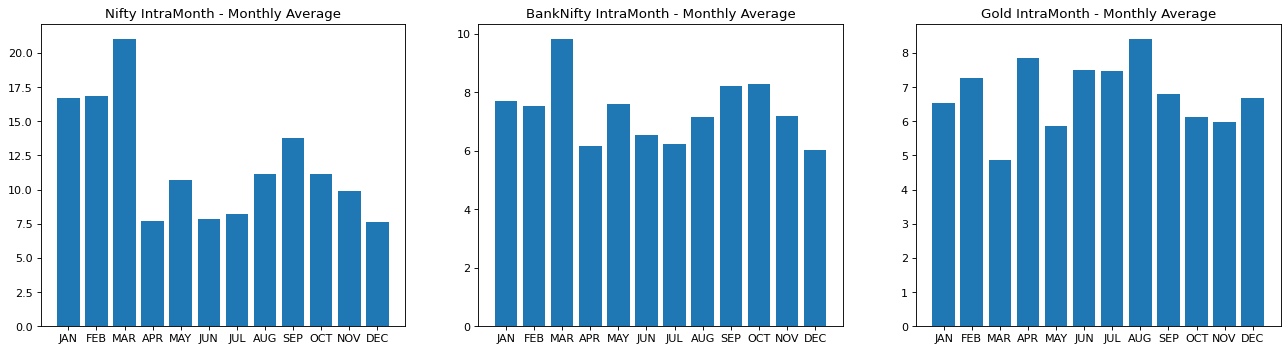

In [20]:
plt.figure(figsize=(20, 5), dpi=80)
plt.subplot(1,3,1)
plt.title("Nifty IntraMonth - Monthly Average")
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], nifty_intra_month)
plt.subplot(1,3,2)
plt.title("BankNifty IntraMonth - Monthly Average")
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], bank_intra_month)
plt.subplot(1,3,3)
plt.title("Gold IntraMonth - Monthly Average")
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], gold_intra_month)

<BarContainer object of 12 artists>

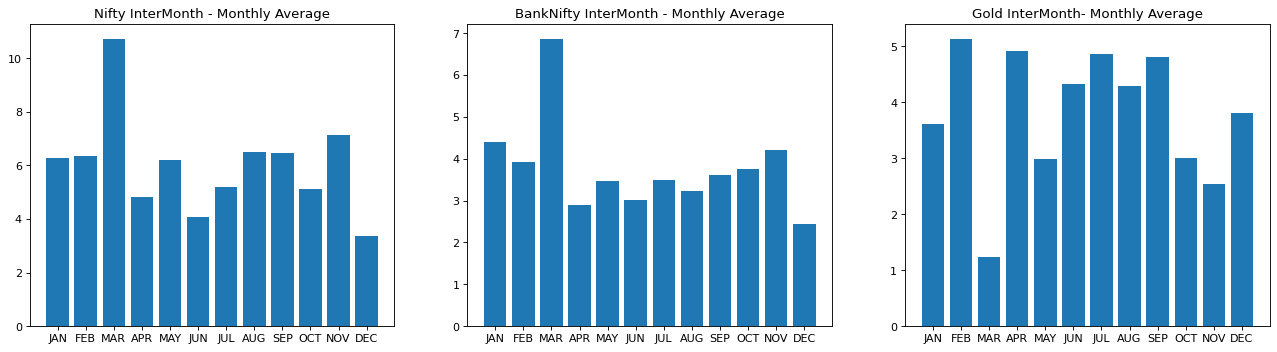

In [21]:
plt.figure(figsize=(20, 5), dpi=80)
plt.subplot(1,3,1)
plt.title("Nifty InterMonth - Monthly Average")
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], nifty_inter_month)
plt.subplot(1,3,2)
plt.title("BankNifty InterMonth - Monthly Average")
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], bank_inter_month)
plt.subplot(1,3,3)
plt.title("Gold InterMonth- Monthly Average")
plt.bar(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], gold_inter_month)

In [39]:
def rank_correlation(df_1, df_2):
    s1 = df_1['Date']
    s2 = df_2['Date']
    common_dates = pd.Series(np.intersect1d(s1.values,s2.values))
    
    x = df_1[df_1['Date'].isin(common_dates)]['IntraMonth Diff']
    y = df_2[df_2['Date'].isin(common_dates)]['IntraMonth Diff']

    plt.scatter(x, y)
    spearman(x, y)

Correlation Coefficient: 0.060834896723777565
Significant relation is not present
p-value: 0.5183743316863922


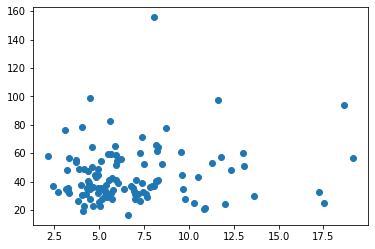

In [45]:
rank_correlation(df3, df4)

In [55]:
#df4.groupby(pd.Grouper(key='Date',freq='Y')).mean().sort_values('Date', ascending=True).head(60)
d = sorter(df3, 'Y', 'IntraMonth Diff')
d

,Open,High,Low,Close,Adj Close,Volume,IntraMonth Diff,InterMonth Change
Date,,,,,,,,
2011-12-31,1560.509091,1652.981818,1487.927273,1577.545455,1577.545477,107043.181818,10.285455,6.847273
2013-12-31,1458.940000,1496.120000,1355.780000,1420.440000,1420.439990,115291.600000,9.741000,5.909000
2020-12-31,1750.670000,1849.700000,1709.740000,1794.950000,1794.950000,82342.000000,8.030000,3.640000
2016-12-31,1237.518182,1293.800000,1205.854545,1250.327273,1250.327281,98370.818182,7.195455,3.702727
2021-12-31,1838.633333,1860.700000,1731.500000,1763.066667,1763.066691,136885.666667,6.956667,3.403333
2010-12-31,1214.109091,1265.636364,1188.027273,1236.827273,1236.827271,137862.727273,6.427273,3.437273
2015-12-31,1146.388889,1193.955556,1120.822222,1151.733333,1151.733344,87173.333333,6.381111,4.363333
2014-12-31,1253.254545,1299.254545,1221.345455,1244.900000,1244.900002,113986.454545,6.239091,2.610000
2012-12-31,1685.277778,1729.877778,1628.455556,1678.244444,1678.244453,112635.000000,6.031111,3.955556


In [47]:
sorter(df2, 'Y', 'InterMonth Change')

,Open,High,Low,Close,Adj Close,Volume,IntraMonth Diff,InterMonth Change
Date,,,,,,,,
2020-12-31,11002.587500,11675.095833,10405.162500,11150.458333,11150.458333,1.366220e+07,11.754167,7.780833
2011-12-31,5468.150000,5609.737500,5082.800000,5312.675000,5312.674968,0.000000e+00,9.711667,5.715000
2012-12-31,5306.279167,5540.750000,5113.066667,5410.562500,5410.562500,0.000000e+00,8.119167,3.837500
2018-12-31,10818.604167,11101.425000,10423.587500,10826.450000,10826.449951,5.105908e+06,6.254167,3.715000
2016-12-31,8133.041667,8336.954167,7825.158333,8139.233333,8139.233317,3.981033e+06,6.402500,3.613333
2014-12-31,7293.625000,7589.045833,7123.395833,7453.495833,7453.495890,3.139092e+06,6.437500,3.412500
2013-12-31,5886.695833,6119.995833,5674.050000,5908.087500,5908.087484,3.293317e+06,7.662500,3.345833
2010-12-31,5392.554167,5629.016667,5217.608333,5462.091667,5462.091675,0.000000e+00,7.612500,2.915000
2017-12-31,9501.904167,9788.191667,9350.020833,9661.416667,9661.416585,4.082917e+06,4.630833,2.885000
